# Convolutional Neural Network : CNN

- Vision 연구에서는 특징을 찾기 위해서 다양한 방법을 개발했다.

- 그렇다면, 이미지 데이터에서 어떠한 특징을 찾아야할까?


### Hand-crafted Feature

- 경험적 지식을 통해 직접 수작업으로 설계한 특징


## 주요 Layer

- Dense Layer는 Fully Connected Layer

- Flatten Layer는 다차원 이미지를 1차원으로 바꿔주는 Layer

### Feature Extractor

- Convolution Layer와 Pooling Layer가 있으며, 두 Layer가 교차되며 배치된다.

### Classifier

- Dense Layer가 Classifier 역할을 한다.

- Overfitting을 막기 위해서 Dense Layer 사이에 Dropout Layer가 배치된다. (마지막 Layer 뒤에는 X)

#### Convolution Layer

- Convolution 연산을 하는 레이어로, Filter는 학습을 통해서 자동으로 추출된다.

- 때문에 우리가 조절해야할 것은 필터의 개수 정도이다.
``` python
conv1 = tf.keras.layers.Conv2D(kernel_size=(3,3), strides=(2,2), padding='valid', filters=16)
```

#### Pooling Layer

- 인접한 Pixel들은 비슷한 정보를 가지고 있는 경우가 많다.

- 이미지의 크기를 줄이면서 중요한 정보만을 남기기 위해 Subsampling 이라는 기법을 사용한다.

- 효율적 메모리 사용 뿐만이 아니라, 계산할 정보가 줄어들기 때문에 Overfitting 방지 효과도 있다.

- 이 때, 사용되는 Layer가 Pooling Layer 이며, Max / Average Pooling Layer 등이 있다 (Max가 더 많이 쓰인다)
``` python
pool1 = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))
```

#### Dropout Layer

- Network의 Overfitting을 막기 위한 노력의 결과중 하나로 학습 과정에서 무작위로 뉴런의 일부를 제거하는 것이다.

- 즉, 한쪽에 치우치지 않도록 학습시에만 일부 뉴런간의 연결을 끊어두는 것이다.
``` python
dropout = tf.keras.layers.Dropout(rate=0.3)
```

In [1]:
!nvidia-smi

Wed Mar 25 15:31:38 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

print(train_X.shape, test_X.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


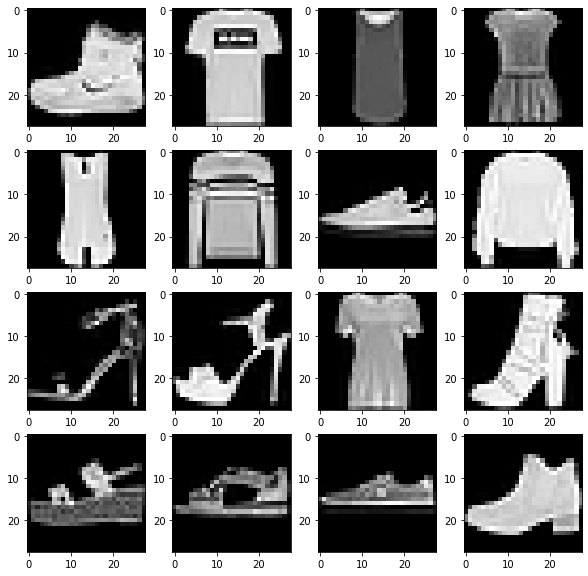

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for c in range(16):
    plt.subplot(4, 4, c+1)
    plt.imshow(train_X[c].reshape(28, 28), cmap='gray')

plt.show()
print(train_Y[:16])

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params:

In [7]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 13s 298us/sample - loss: 0.4582 - acc: 0.8371 - val_loss: 0.3943 - val_acc: 0.8572
Epoch 2/25
45000/45000 [==============================] - 7s 160us/sample - loss: 0.3379 - acc: 0.8771 - val_loss: 0.3663 - val_acc: 0.8693
Epoch 3/25
45000/45000 [==============================] - 7s 161us/sample - loss: 0.2806 - acc: 0.8966 - val_loss: 0.3964 - val_acc: 0.8668
Epoch 4/25
45000/45000 [==============================] - 7s 162us/sample - loss: 0.2435 - acc: 0.9107 - val_loss: 0.3901 - val_acc: 0.8713
Epoch 5/25
45000/45000 [==============================] - 7s 161us/sample - loss: 0.2057 - acc: 0.9253 - val_loss: 0.4626 - val_acc: 0.8607
Epoch 6/25
45000/45000 [==============================] - 7s 163us/sample - loss: 0.1805 - acc: 0.9343 - val_loss: 0.4346 - val_acc: 0.8721
Epoch 7/25
45000/45000 [==============================] - 7s 162us/sample - loss: 0.1593 - acc: 0.9411 - val_

KeyError: ignored

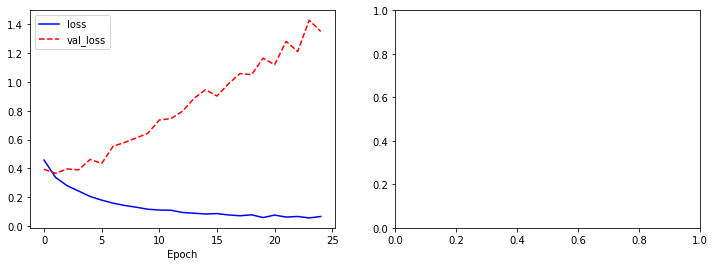

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
#plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=16),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64),
    tf.keras.layers.MaxPool2D(strides=(2, 2)),
    tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        9280      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [13]:
history = model.fit(train_X, train_Y, epochs=25, validation_split=0.25)

Train on 45000 samples, validate on 15000 samples
Epoch 1/25
45000/45000 [==============================] - 7s 155us/sample - loss: 0.4887 - acc: 0.8214 - val_loss: 0.3711 - val_acc: 0.8629
Epoch 2/25
45000/45000 [==============================] - 7s 151us/sample - loss: 0.3224 - acc: 0.8825 - val_loss: 0.3225 - val_acc: 0.8830
Epoch 3/25
45000/45000 [==============================] - 7s 148us/sample - loss: 0.2754 - acc: 0.8989 - val_loss: 0.2980 - val_acc: 0.8912
Epoch 4/25
45000/45000 [==============================] - 7s 153us/sample - loss: 0.2439 - acc: 0.9094 - val_loss: 0.3057 - val_acc: 0.8893
Epoch 5/25
45000/45000 [==============================] - 7s 147us/sample - loss: 0.2184 - acc: 0.9180 - val_loss: 0.3071 - val_acc: 0.8939
Epoch 6/25
45000/45000 [==============================] - 7s 150us/sample - loss: 0.1982 - acc: 0.9266 - val_loss: 0.2951 - val_acc: 0.8988
Epoch 7/25
45000/45000 [==============================] - 7s 148us/sample - loss: 0.1775 - acc: 0.9339 - val_l

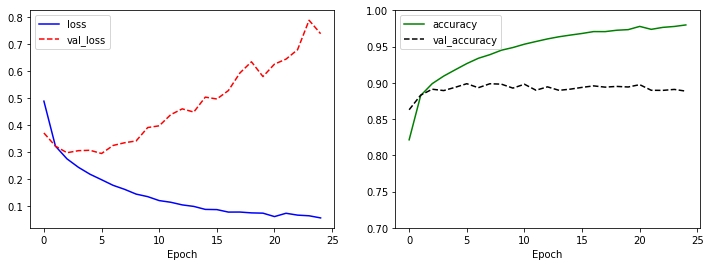

[0.7898941616624594, 0.8835]

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], 'g-', label='accuracy')
plt.plot(history.history['val_acc'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y, verbose=0)